In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## KMeans Clusterer

In [2]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from scipy.spatial.distance import cdist

In [3]:
filename = '../../data/processed/feature-eng.csv'
df = pd.read_csv(filename)

In [4]:
df = df.sort_values(['zipcode','start_year']).reset_index(drop=True)

In [5]:
df.head()

,zipcode,start_year,avg_eqi_year_5-10,year_1_EQI_MSA,year_1_EQI_state,year_1_EQI_zip,year_1_RECPI_MSA,year_1_RECPI_state,year_1_RECPI_zip,year_2_EQI_MSA,...,recpi_zip_change_4,recpi_msa_change_1,recpi_msa_change_2,recpi_msa_change_3,recpi_msa_change_4,recpi_state_change_1,recpi_state_change_2,recpi_state_change_3,recpi_state_change_4,avg_eqi_year_1-5
0,1001,1992,0.001287,0.001549,0.002111,0.002216,1.176877,28.052156,0.048744,0.001266,...,2.333669,0.886418,1.074673,1.215163,0.883213,1.034792,1.020560,1.036390,1.251689,0.002170
1,1001,1997,0.001853,0.001233,0.002386,0.000840,1.112023,41.174500,0.035283,0.001164,...,1.378256,0.851011,2.201297,0.567565,0.995583,1.073900,1.245044,1.448812,0.693670,0.001287
2,1001,2002,0.000602,0.001494,0.002450,0.001504,1.746593,50.713380,0.054131,0.001073,...,4.531509,0.740460,1.353943,0.642606,1.292821,0.971759,0.905151,1.007785,1.046863,0.001853
3,1001,2007,0.000898,0.000702,0.001817,0.000611,1.081845,45.171143,0.036063,0.000758,...,0.672958,1.030793,0.855337,1.170414,1.025070,1.089005,0.801518,1.088810,1.051707,0.000602
4,1002,1992,0.002931,0.001549,0.002111,0.000959,1.176877,28.052156,0.020148,0.001266,...,0.392888,0.886418,1.074673,1.215163,0.883213,1.034792,1.020560,1.036390,1.251689,0.003141


In [6]:
y = df[['avg_eqi_year_5-10']]
X = df.drop(['zipcode','start_year','avg_eqi_year_5-10'], axis=1)
scaler = StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X))
X_scaled.columns = X.columns
X_scaled.head()

,year_1_EQI_MSA,year_1_EQI_state,year_1_EQI_zip,year_1_RECPI_MSA,year_1_RECPI_state,year_1_RECPI_zip,year_2_EQI_MSA,year_2_EQI_state,year_2_EQI_zip,year_2_RECPI_MSA,...,recpi_zip_change_4,recpi_msa_change_1,recpi_msa_change_2,recpi_msa_change_3,recpi_msa_change_4,recpi_state_change_1,recpi_state_change_2,recpi_state_change_3,recpi_state_change_4,avg_eqi_year_1-5
0,1.185991,3.101660,1.251538,-0.330854,-0.015570,0.214847,1.156580,3.010210,0.308747,-0.366722,...,0.128329,-0.083148,-0.078591,-0.031927,-0.068296,-0.007148,-0.025667,-0.029326,0.155285,1.875553
1,0.798592,3.671295,0.235770,-0.339316,0.267740,0.069167,0.994389,4.069707,0.618625,-0.379266,...,-0.035522,-0.083170,-0.078499,-0.032883,-0.068229,0.005287,0.071806,0.153878,-0.252782,0.887371
2,1.119195,3.802470,0.725773,-0.256511,0.473684,0.273145,0.850100,3.419742,1.302539,-0.334337,...,0.505255,-0.083235,-0.078568,-0.032772,-0.068052,-0.027190,-0.075778,-0.042033,0.005500,1.520915
3,0.147200,2.492929,0.066790,-0.343254,0.354027,0.077606,0.348184,3.149568,0.132368,-0.357404,...,-0.156479,-0.083062,-0.078609,-0.031994,-0.068211,0.010090,-0.120776,-0.006040,0.009042,0.121677
4,1.185991,3.101660,0.323919,-0.330854,-0.015570,-0.094622,1.156580,3.010210,2.222501,-0.366722,...,-0.204510,-0.083148,-0.078591,-0.031927,-0.068296,-0.007148,-0.025667,-0.029326,0.155285,2.961558


#### Whole Dataset

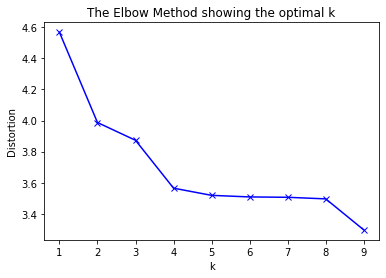

In [7]:
# create new plot and data
plt.plot()
colors = ['b', 'g', 'r']
markers = ['o', 'v', 's']

# k means determine k
distortions = []
K = range(1,10)
for k in K:
    model = KMeans(n_clusters=k).fit(X_scaled)
    distortions.append(sum(np.min(cdist(X_scaled, model.cluster_centers_, 'euclidean'), axis=1)) / X_scaled.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [8]:
dataset_clusterer = KMeans(n_clusters=4).fit(X_scaled)

#### Zip

In [9]:
X_zip = X_scaled.filter(regex='zip$', axis=1)
X_zip.head()

,year_1_EQI_zip,year_1_RECPI_zip,year_2_EQI_zip,year_2_RECPI_zip,year_3_EQI_zip,year_3_RECPI_zip,year_4_EQI_zip,year_4_RECPI_zip,year_5_EQI_zip,year_5_RECPI_zip
0,1.251538,0.214847,0.308747,-0.072511,3.774334,1.282764,0.349331,-0.073654,1.156403,0.215995
1,0.235770,0.069167,0.618625,-0.011875,0.991997,0.216339,0.303971,0.045162,1.050844,0.180188
2,0.725773,0.273145,1.302539,0.562916,0.563950,0.218766,0.273606,0.060263,2.579561,1.353463
3,0.066790,0.077606,0.132368,0.093187,0.126282,-0.056009,0.098547,0.020658,0.004722,-0.083512
4,0.323919,-0.094622,2.222501,0.926335,2.245770,0.828222,3.998543,1.279253,0.971300,0.356615


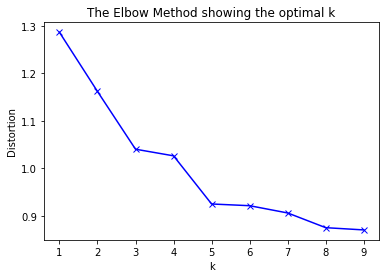

In [10]:
# create new plot and data
plt.plot()
colors = ['b', 'g', 'r']
markers = ['o', 'v', 's']

# k means determine k
distortions = []
K = range(1,10)
for k in K:
    model = KMeans(n_clusters=k).fit(X_zip)
    distortions.append(sum(np.min(cdist(X_zip, model.cluster_centers_, 'euclidean'), axis=1)) / X_zip.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [11]:
zip_clusterer = KMeans(n_clusters=3).fit(X_zip)

#### MSA

In [12]:
X_msa = X_scaled.filter(regex='MSA$', axis=1)
X_msa.head()

,year_1_EQI_MSA,year_1_RECPI_MSA,year_2_EQI_MSA,year_2_RECPI_MSA,year_3_EQI_MSA,year_3_RECPI_MSA,year_4_EQI_MSA,year_4_RECPI_MSA,year_5_EQI_MSA,year_5_RECPI_MSA
0,1.185991,-0.330854,1.156580,-0.366722,1.491923,-0.367620,1.807625,-0.338894,1.419335,-0.352360
1,0.798592,-0.339316,0.994389,-0.379266,3.074423,-0.248188,1.191386,-0.358093,1.316383,-0.355312
2,1.119195,-0.256511,0.850100,-0.334337,1.196150,-0.289421,0.349907,-0.364187,0.680615,-0.323915
3,0.147200,-0.343254,0.348184,-0.357404,0.343634,-0.388385,0.436597,-0.365129,0.498189,-0.359016
4,1.185991,-0.330854,1.156580,-0.366722,1.491923,-0.367620,1.807625,-0.338894,1.419335,-0.352360


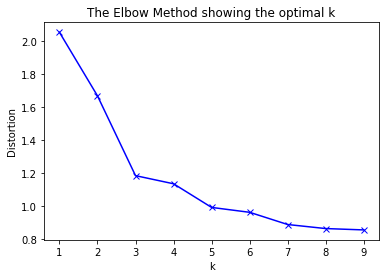

In [13]:
# create new plot and data
plt.plot()
colors = ['b', 'g', 'r']
markers = ['o', 'v', 's']

# k means determine k
distortions = []
K = range(1,10)
for k in K:
    model = KMeans(n_clusters=k).fit(X_msa)
    distortions.append(sum(np.min(cdist(X_msa, model.cluster_centers_, 'euclidean'), axis=1)) / X_msa.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [14]:
msa_clusterer = KMeans(n_clusters=3).fit(X_msa)

#### State

In [17]:
X_state = X_scaled.filter(regex='state$', axis=1)
X_state.head()

,year_1_EQI_state,year_1_RECPI_state,year_2_EQI_state,year_2_RECPI_state,year_3_EQI_state,year_3_RECPI_state,year_4_EQI_state,year_4_RECPI_state,year_5_EQI_state,year_5_RECPI_state
0,3.101660,-0.015570,3.010210,0.010300,2.828211,-0.004741,2.606813,-0.044446,3.404295,0.102615
1,3.671295,0.267740,4.069707,0.349061,4.729936,0.532530,5.737127,0.838914,4.766360,0.417774
2,3.802470,0.473684,3.419742,0.462000,2.536466,0.311821,2.169356,0.212169,2.603874,0.263585
3,2.492929,0.354027,3.149568,0.460002,2.464278,0.202392,2.270770,0.175712,2.547686,0.227930
4,3.101660,-0.015570,3.010210,0.010300,2.828211,-0.004741,2.606813,-0.044446,3.404295,0.102615


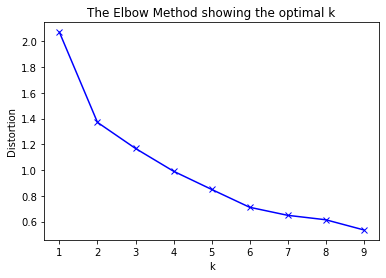

In [18]:
# create new plot and data
plt.plot()
colors = ['b', 'g', 'r']
markers = ['o', 'v', 's']

# k means determine k
distortions = []
K = range(1,10)
for k in K:
    model = KMeans(n_clusters=k).fit(X_state)
    distortions.append(sum(np.min(cdist(X_state, model.cluster_centers_, 'euclidean'), axis=1)) / X_state.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [19]:
state_clusterer = KMeans(n_clusters=2).fit(X_state)

#### EQI

In [20]:
X_eqi = df.filter(regex='.*EQI.*', axis=1)
X_eqi.head()

,year_1_EQI_MSA,year_1_EQI_state,year_1_EQI_zip,year_2_EQI_MSA,year_2_EQI_state,year_2_EQI_zip,year_3_EQI_MSA,year_3_EQI_state,year_3_EQI_zip,year_4_EQI_MSA,year_4_EQI_state,year_4_EQI_zip,year_5_EQI_MSA,year_5_EQI_state,year_5_EQI_zip
0,0.001549,0.002111,0.002216,0.001266,0.002057,0.000827,0.001394,0.001996,0.004772,0.001667,0.002023,0.001065,0.001361,0.002326,0.001971
1,0.001233,0.002386,0.000840,0.001164,0.002573,0.001156,0.002317,0.002948,0.001614,0.001278,0.003745,0.000990,0.001299,0.003029,0.001835
2,0.001494,0.002450,0.001504,0.001073,0.002257,0.001882,0.001222,0.001850,0.001128,0.000747,0.001782,0.000939,0.000917,0.001913,0.003813
3,0.000702,0.001817,0.000611,0.000758,0.002125,0.000640,0.000725,0.001814,0.000631,0.000801,0.001838,0.000649,0.000808,0.001884,0.000480
4,0.001549,0.002111,0.000959,0.001266,0.002057,0.002858,0.001394,0.001996,0.003037,0.001667,0.002023,0.007120,0.001361,0.002326,0.001732


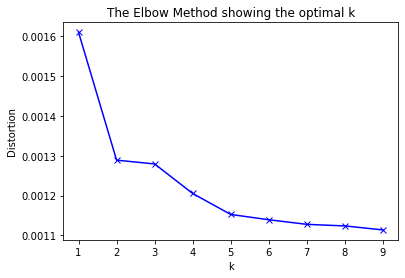

In [21]:
# create new plot and data
plt.plot()
colors = ['b', 'g', 'r']
markers = ['o', 'v', 's']

# k means determine k
distortions = []
K = range(1,10)
for k in K:
    model = KMeans(n_clusters=k).fit(X_eqi)
    distortions.append(sum(np.min(cdist(X_eqi, model.cluster_centers_, 'euclidean'), axis=1)) / X_eqi.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [22]:
eqi_clusterer = KMeans(n_clusters=2).fit(X_eqi)

#### RECPI

In [23]:
X_recpi = df.filter(regex='.*RECPI.*', axis=1)
X_recpi.head()

,year_1_RECPI_MSA,year_1_RECPI_state,year_1_RECPI_zip,year_2_RECPI_MSA,year_2_RECPI_state,year_2_RECPI_zip,year_3_RECPI_MSA,year_3_RECPI_state,year_3_RECPI_zip,year_4_RECPI_MSA,year_4_RECPI_state,year_4_RECPI_zip,year_5_RECPI_MSA,year_5_RECPI_state,year_5_RECPI_zip
0,1.176877,28.052156,0.048744,1.043205,29.028145,0.022334,1.121105,29.624968,0.157489,1.362325,30.703022,0.024496,1.203223,38.430626,0.057166
1,1.112023,41.174500,0.035283,0.946344,44.217280,0.027745,2.083184,55.052444,0.051642,1.182342,79.760650,0.038602,1.177120,55.327602,0.053203
2,1.746593,50.713380,0.054131,1.293282,49.281204,0.079037,1.751030,44.606937,0.051883,1.125222,44.954205,0.040394,1.454710,47.060886,0.183047
3,1.081845,45.171143,0.036063,1.115158,49.191620,0.037120,0.953836,39.427960,0.024611,1.116383,42.929550,0.035693,1.144370,45.149307,0.024020
4,1.176877,28.052156,0.020148,1.043205,29.028145,0.111467,1.121105,29.624968,0.112374,1.362325,30.703022,0.185111,1.203223,38.430626,0.072728


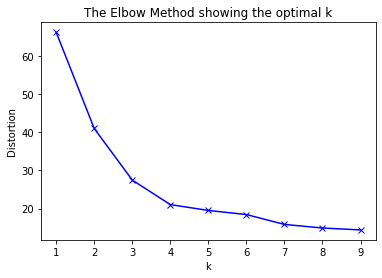

In [24]:
# create new plot and data
plt.plot()
colors = ['b', 'g', 'r']
markers = ['o', 'v', 's']

# k means determine k
distortions = []
K = range(1,10)
for k in K:
    model = KMeans(n_clusters=k).fit(X_recpi)
    distortions.append(sum(np.min(cdist(X_recpi, model.cluster_centers_, 'euclidean'), axis=1)) / X_recpi.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [25]:
recpi_clusterer = KMeans(n_clusters=4).fit(X_recpi)

## Predicting Training Dataset

In [26]:
X_scaled.head()

,year_1_EQI_MSA,year_1_EQI_state,year_1_EQI_zip,year_1_RECPI_MSA,year_1_RECPI_state,year_1_RECPI_zip,year_2_EQI_MSA,year_2_EQI_state,year_2_EQI_zip,year_2_RECPI_MSA,...,recpi_zip_change_4,recpi_msa_change_1,recpi_msa_change_2,recpi_msa_change_3,recpi_msa_change_4,recpi_state_change_1,recpi_state_change_2,recpi_state_change_3,recpi_state_change_4,avg_eqi_year_1-5
0,1.185991,3.101660,1.251538,-0.330854,-0.015570,0.214847,1.156580,3.010210,0.308747,-0.366722,...,0.128329,-0.083148,-0.078591,-0.031927,-0.068296,-0.007148,-0.025667,-0.029326,0.155285,1.875553
1,0.798592,3.671295,0.235770,-0.339316,0.267740,0.069167,0.994389,4.069707,0.618625,-0.379266,...,-0.035522,-0.083170,-0.078499,-0.032883,-0.068229,0.005287,0.071806,0.153878,-0.252782,0.887371
2,1.119195,3.802470,0.725773,-0.256511,0.473684,0.273145,0.850100,3.419742,1.302539,-0.334337,...,0.505255,-0.083235,-0.078568,-0.032772,-0.068052,-0.027190,-0.075778,-0.042033,0.005500,1.520915
3,0.147200,2.492929,0.066790,-0.343254,0.354027,0.077606,0.348184,3.149568,0.132368,-0.357404,...,-0.156479,-0.083062,-0.078609,-0.031994,-0.068211,0.010090,-0.120776,-0.006040,0.009042,0.121677
4,1.185991,3.101660,0.323919,-0.330854,-0.015570,-0.094622,1.156580,3.010210,2.222501,-0.366722,...,-0.204510,-0.083148,-0.078591,-0.031927,-0.068296,-0.007148,-0.025667,-0.029326,0.155285,2.961558


In [27]:
df['dataset_cluster'] = dataset_clusterer.predict(X_scaled)
df['zip_cluster'] = zip_clusterer.predict(X_scaled.filter(regex='zip$', axis=1))
df['msa_cluster'] = msa_clusterer.predict(X_scaled.filter(regex='MSA$', axis=1))
df['state_cluster'] = state_clusterer.predict(X_scaled.filter(regex='state$', axis=1))
df['eqi_cluster'] = eqi_clusterer.predict(X_scaled.filter(regex='.*EQI.*', axis=1))
df['recpi_cluster'] = recpi_clusterer.predict(X_scaled.filter(regex='.*RECPI.*', axis=1))

In [28]:
df.head()

,zipcode,start_year,avg_eqi_year_5-10,year_1_EQI_MSA,year_1_EQI_state,year_1_EQI_zip,year_1_RECPI_MSA,year_1_RECPI_state,year_1_RECPI_zip,year_2_EQI_MSA,...,recpi_state_change_2,recpi_state_change_3,recpi_state_change_4,avg_eqi_year_1-5,dataset_cluster,zip_cluster,msa_cluster,state_cluster,eqi_cluster,recpi_cluster
0,1001,1992,0.001287,0.001549,0.002111,0.002216,1.176877,28.052156,0.048744,0.001266,...,1.020560,1.036390,1.251689,0.002170,3,0,0,1,0,0
1,1001,1997,0.001853,0.001233,0.002386,0.000840,1.112023,41.174500,0.035283,0.001164,...,1.245044,1.448812,0.693670,0.001287,3,0,0,1,0,0
2,1001,2002,0.000602,0.001494,0.002450,0.001504,1.746593,50.713380,0.054131,0.001073,...,0.905151,1.007785,1.046863,0.001853,3,0,0,1,0,0
3,1001,2007,0.000898,0.000702,0.001817,0.000611,1.081845,45.171143,0.036063,0.000758,...,0.801518,1.088810,1.051707,0.000602,3,0,0,1,0,0
4,1002,1992,0.002931,0.001549,0.002111,0.000959,1.176877,28.052156,0.020148,0.001266,...,1.020560,1.036390,1.251689,0.003141,3,1,0,1,0,0


In [29]:
path = '../../data/processed/feature-eng-clustered.csv'
df.to_csv(path, index=False)